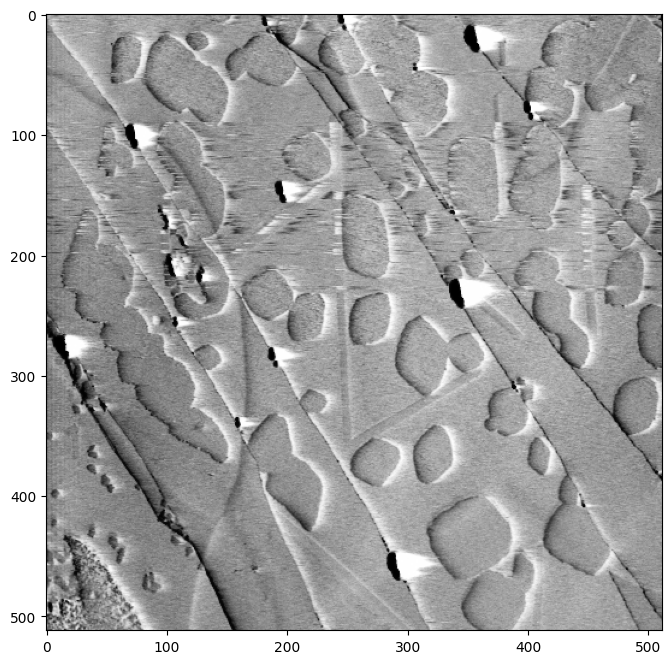

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

fig1 = plt.figure(figsize=(8, 8))
ax = fig1.add_subplot(1, 1, 1)
plt.imshow(img_arr, cmap='gray')
plt.show()

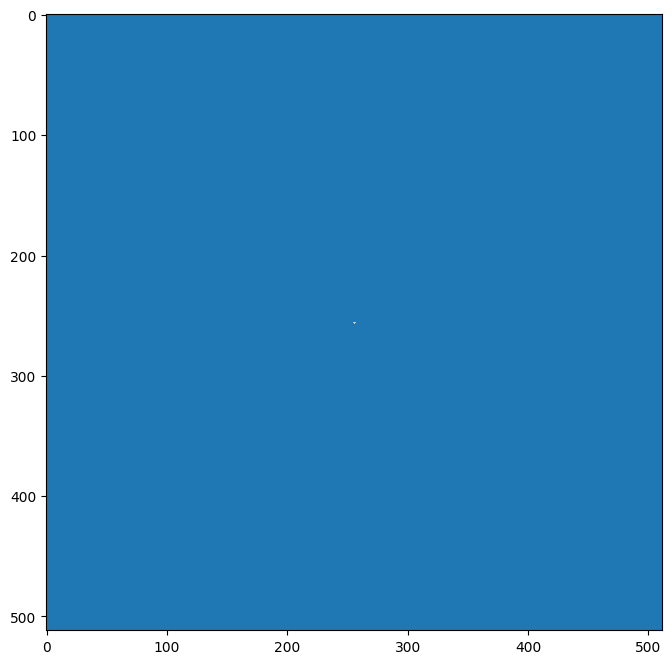

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

fft_image = np.fft.fft2(img_arr)
fft_image = np.fft.fftshift(fft_image)

fig1 = plt.figure(figsize=(8, 8))
ax = fig1.add_subplot(1, 1, 1)
plt.imshow(np.abs(fft_image), cmap='tab20')
plt.show()

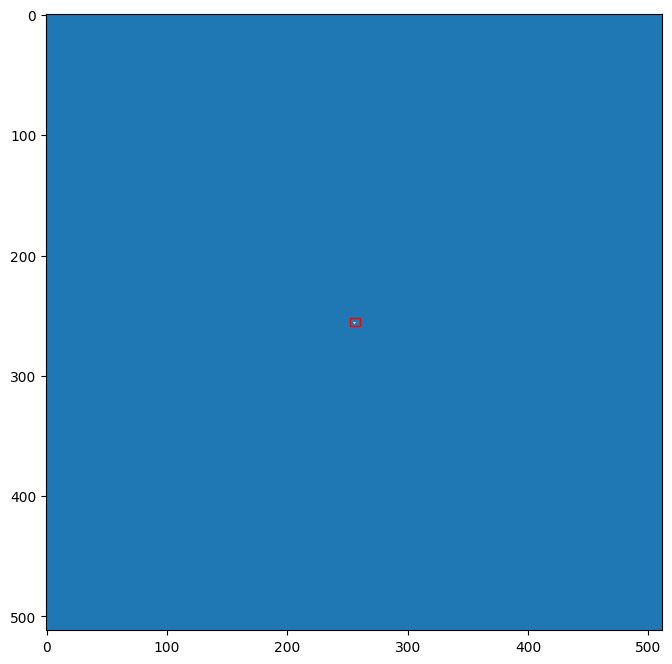

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib import patches


def plotMask(ROI, edgeColor):
    rectROI = []
    for roi in ROI:
        top_left_x, bottom_right_x, top_left_y, bottom_right_y = roi[0], roi[1], roi[2], roi[3]

        # Create a rectangle patch
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y,
                                 linewidth=1, edgecolor=edgeColor, facecolor='none')
        rectROI.append(rect)

    return rectROI[0]


image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

fft_image = np.fft.fft2(img_arr)
fft_image = np.fft.fftshift(fft_image)

mask = np.empty((img_size[0], img_size[1]))
mask_region = [252, 260, 252, 259]

for i in range(mask_region[2], mask_region[3] + 1):
    for j in range(mask_region[0], mask_region[1] + 1):
        mask[i][j] = 1

fig1 = plt.figure(figsize=(8, 8))
ax = fig1.add_subplot(1, 1, 1)
ax.add_patch(plotMask(np.array([mask_region]), 'r'))
plt.imshow(np.abs(fft_image), cmap='tab20')
plt.show()

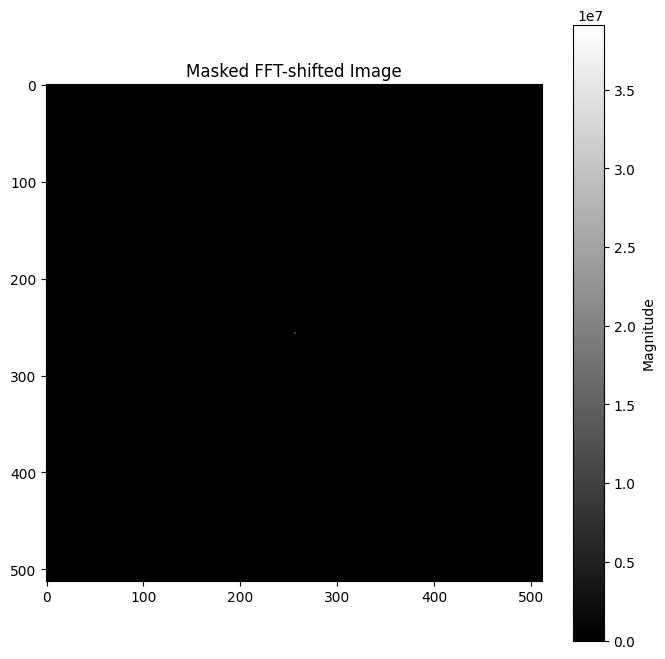

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib import patches

def plotMask(ROI, edgeColor):
    rectROI = []
    for roi in ROI:
        top_left_x, bottom_right_x, top_left_y, bottom_right_y = roi[0], roi[1], roi[2], roi[3]

        # Create a rectangle patch
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y,
                                 linewidth=1, edgecolor=edgeColor, facecolor='none')
        rectROI.append(rect)

    return rectROI[0]

image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

# Compute FFT
fft_image = np.fft.fft2(img_arr)
fft_image = np.fft.fftshift(fft_image)

# Define mask region
mask_region = [252, 258, 252, 259]

# Create a mask
mask = np.zeros_like(img_arr)
mask[mask_region[2]:mask_region[3]+1, mask_region[0]:mask_region[1]+1] = 1

# Apply the mask to the FFT-shifted image
masked_fft_image = fft_image * mask

# Display the masked FFT-shifted image
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(masked_fft_image), cmap='gray')
plt.title('Masked FFT-shifted Image')
plt.colorbar(label='Magnitude')
plt.show()

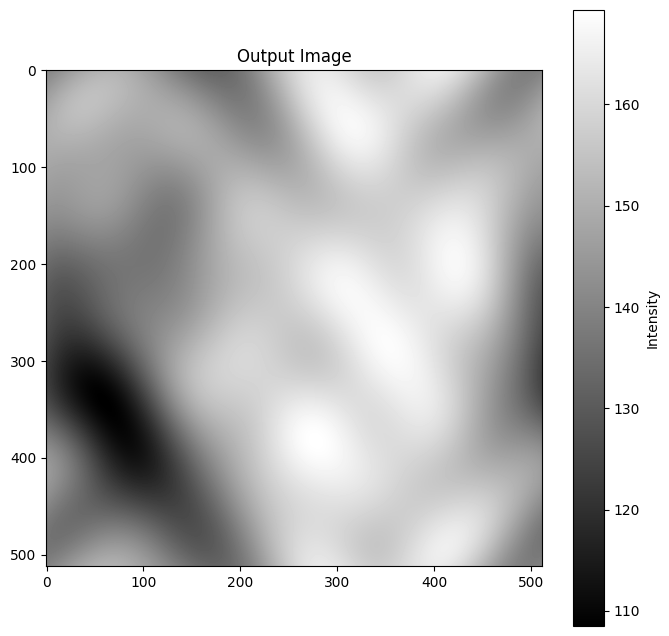

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib import patches

def plotMask(ROI, edgeColor):
    rectROI = []
    for roi in ROI:
        top_left_x, bottom_right_x, top_left_y, bottom_right_y = roi[0], roi[1], roi[2], roi[3]

        # Create a rectangle patch
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y,
                                 linewidth=1, edgecolor=edgeColor, facecolor='none')
        rectROI.append(rect)

    return rectROI[0]

image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

# Compute FFT
fft_image = np.fft.fft2(img_arr)
fft_image = np.fft.fftshift(fft_image)

# Define mask region
mask_region = [252, 258, 252, 259]

# Create a mask
mask = np.zeros_like(img_arr)
mask[mask_region[2]:mask_region[3]+1, mask_region[0]:mask_region[1]+1] = 1

# Apply the mask to the FFT-shifted image
masked_fft_image = fft_image * mask

# Perform inverse FFT to obtain the output image
output_image = np.fft.ifftshift(masked_fft_image)
output_image = np.fft.ifft2(output_image)
output_image = np.abs(output_image)

# Display the output image
plt.figure(figsize=(8, 8))
plt.imshow(output_image, cmap='gray')
plt.title('Output Image')
plt.colorbar(label='Intensity')
plt.show()

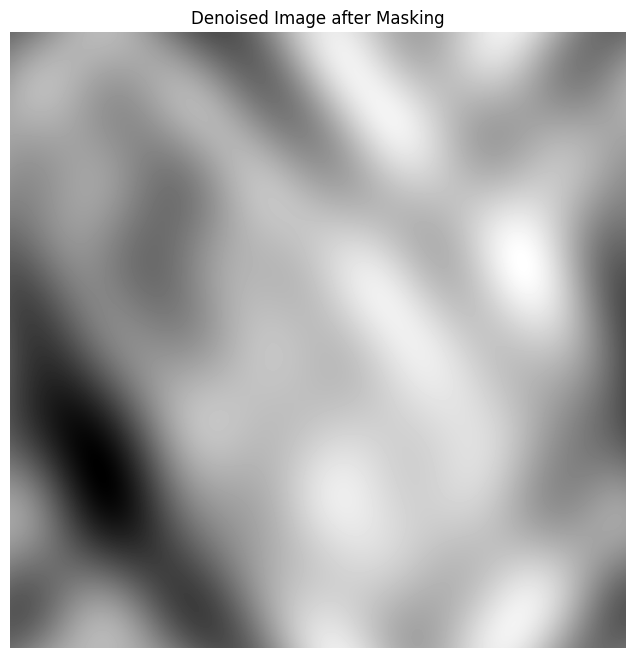

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib import patches

def plotMask(ROI, edgeColor):
    rectROI = []
    for roi in ROI:
        top_left_x, bottom_right_x, top_left_y, bottom_right_y = roi[0], roi[1], roi[2], roi[3]

        # Create a rectangle patch
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y,
                                 linewidth=1, edgecolor=edgeColor, facecolor='none')
        rectROI.append(rect)

    return rectROI[0]

image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

# Compute FFT
fft_image = np.fft.fft2(img_arr)
fft_image_shifted = np.fft.fftshift(fft_image)

# Define mask region
mask_region = [252, 260, 252, 259]

# Create a mask
mask = np.zeros_like(img_arr)
mask[mask_region[2]:mask_region[3]+1, mask_region[0]:mask_region[1]+1] = 1

# Apply the mask to the FFT-shifted image
masked_fft_image = fft_image_shifted * mask

# Inverse FFT to get the denoised image
denoised_image = np.fft.ifft2(np.fft.ifftshift(masked_fft_image)).real

# Display the denoised image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image after Masking')
plt.axis('off')
plt.show()

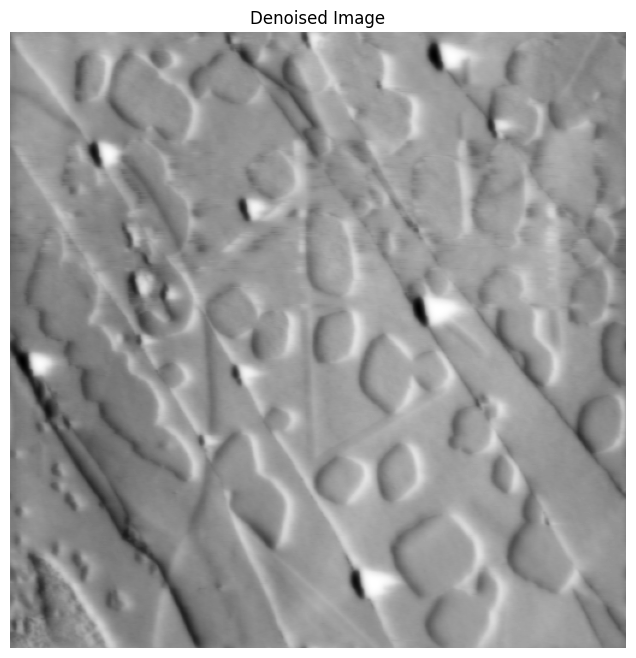

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib import patches

def plotMask(ROI, edgeColor):
    rectROI = []
    for roi in ROI:
        top_left_x, bottom_right_x, top_left_y, bottom_right_y = roi[0], roi[1], roi[2], roi[3]

        # Create a rectangle patch
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y,
                                 linewidth=1, edgecolor=edgeColor, facecolor='none')
        rectROI.append(rect)

    return rectROI[0]

image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img = img.convert("L")
img_arr = np.asarray(img)
img_size = img_arr.shape

# Compute FFT
fft_image = np.fft.fft2(img_arr)
fft_image_shifted = np.fft.fftshift(fft_image)

# Define Gaussian filter parameters
sigma = 20 # Adjust sigma according to the level of noise

# Create Gaussian filter in frequency domain
gaussian_filter_fft = gaussian_filter(np.abs(fft_image_shifted), sigma)

# Apply the filter to FFT-shifted image
denoised_fft_image = fft_image_shifted * gaussian_filter_fft

# Inverse FFT to get the denoised image
denoised_image = np.fft.ifft2(np.fft.ifftshift(denoised_fft_image)).real

# Display the denoised image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()

<ipython-input-45-e4f5484a1445>:51: RuntimeWarning: invalid value encountered in cast
  denoised_image_uint8 = np.uint8(np.abs(denoised_image))


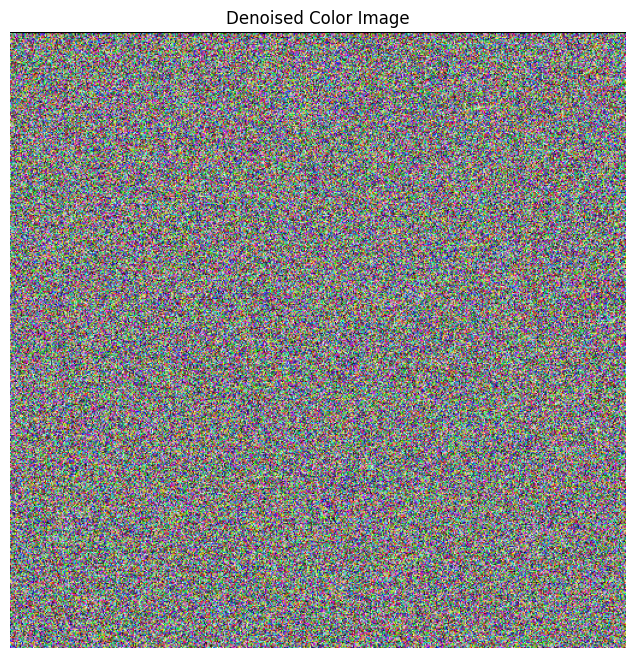

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib import patches

# Normalize the denoised image to the range [0, 255]
denoised_image_normalized = (denoised_image - np.min(denoised_image)) / (np.max(denoised_image) - np.min(denoised_image)) * 255

# Convert the denoised image to uint8
denoised_image_uint8 = np.uint8(denoised_image_normalized)


def plotMask(ROI, edgeColor):
    rectROI = []
    for roi in ROI:
        top_left_x, bottom_right_x, top_left_y, bottom_right_y = roi[0], roi[1], roi[2], roi[3]

        # Create a rectangle patch
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y,
                                 linewidth=1, edgecolor=edgeColor, facecolor='none')
        rectROI.append(rect)

    return rectROI[0]

image_path = "/content/1_amplitude.jpg"
img = Image.open(image_path)
img_arr = np.array(img)
img_size = img_arr.shape

# Convert the image to numpy array
img_array = np.array(img)

# Compute FFT for each channel
fft_image = np.fft.fft2(img_array, axes=(0, 1))
fft_image_shifted = np.fft.fftshift(fft_image, axes=(0, 1))

# Define Gaussian filter parameters
sigma = 10  # Adjust sigma according to the level of noise

# Create Gaussian filter in frequency domain
gaussian_filter_fft = gaussian_filter(np.abs(fft_image_shifted), sigma)

# Apply the filter to FFT-shifted image
denoised_fft_image = fft_image_shifted * gaussian_filter_fft

# Inverse FFT to get the denoised image
denoised_image = np.fft.ifft2(np.fft.ifftshift(denoised_fft_image, axes=(0, 1))).real

# Convert the denoised image to uint8
denoised_image_uint8 = np.uint8(np.abs(denoised_image))

# Display the denoised color image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_image_uint8)
plt.title('Denoised Color Image')
plt.axis('off')
plt.show()